In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("../data/train.csv")

In [46]:
byPclass = train.groupby('Pclass')

firstClass = byPclass.get_group(1)
secondClass = byPclass.get_group(2)
thirdClass = byPclass.get_group(3)

def get_survived_filter(df):
    return (df['Survived'] == 1)

data = {}
filt = get_survived_filter(thirdClass)
thirdClass[filt]['Sex'].value_counts()

byPclass

#byPclass['Survived'].hist()

female    72
male      47
Name: Sex, dtype: int64

In [53]:
byPclass['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

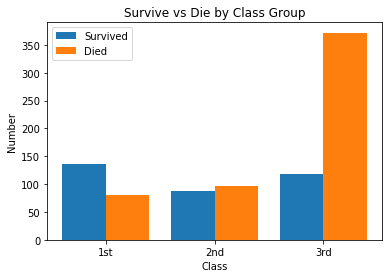

In [67]:
labels = ["1st", "2nd", "3rd"]
survived = [136, 87, 119]
died = [80, 97, 372]

X_axis = np.arange(len(survived))
plt.bar(X_axis-0.2, survived, 0.4, label = 'Survived')
plt.bar(X_axis+0.2, died, 0.4, label = 'Died')

plt.xticks(X_axis, labels)
plt.xlabel("Class")
plt.ylabel("Number")
plt.title("Survive vs Die by Class Group")
plt.legend()
plt.savefig("../img/survive_vs_die_by_class_group.png")

In [72]:
byEmbark = train.groupby('Embarked')
byEmbark['Survived'].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

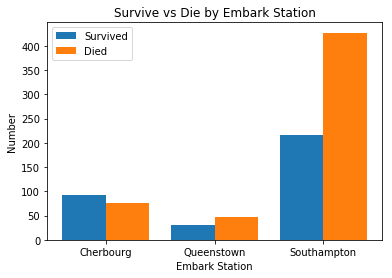

In [83]:
labels = ["Cherbourg", "Queenstown", "Southampton"]
survived = [93, 30, 217]
died = [75, 47, 427]

X_axis = np.arange(len(survived))
plt.bar(X_axis-0.2, survived, 0.4, label = 'Survived')
plt.bar(X_axis+0.2, died, 0.4, label = 'Died')

plt.xticks(X_axis, labels)
plt.xlabel("Embark Station")
plt.ylabel("Number")
plt.title("Survive vs Die by Embark Station")
plt.legend()
plt.savefig("../img/survive_vs_die_by_embark_group.png")

In [85]:
cherbourg = byEmbark.get_group('C')

filt = (cherbourg['Sex'] == "male") & (cherbourg['Survived'] == 1)
cherbourg['Sex'].value_counts()

male      95
female    73
Name: Sex, dtype: int64

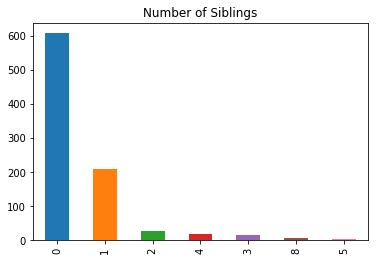

In [97]:
train['SibSp'].value_counts().plot(kind="bar", title="Number of Siblings")
plt.savefig("../img/number_of_siblings.png")

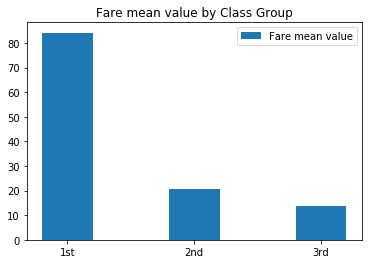

In [116]:
labels = ["1st", "2nd", "3rd"]
values = []
values.append(firstClass['Fare'].mean())
values.append(secondClass['Fare'].mean())
values.append(thirdClass['Fare'].mean())

plt.bar(labels, values, 0.4, label = 'Fare mean value')
plt.legend()
plt.title("Fare mean value by Class Group")
plt.savefig("../img/fare_mean_value_by_class_group.png")